In [286]:
#Data Loading and Munging
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import matplotlib.pyplot as plt


#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Model Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




In [264]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [7]:
train['Response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

<AxesSubplot:ylabel='Response'>

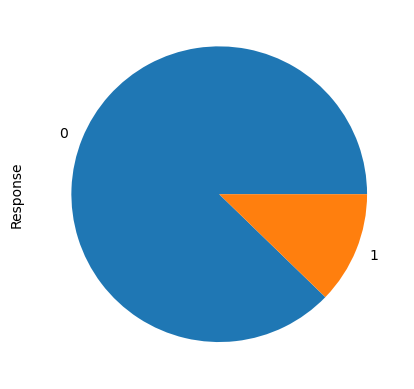

In [8]:
train['Response'].value_counts(normalize=True).plot(kind = 'pie')

In [10]:
#For ROC-AUC Score we need to upload the target result in a Probablity

In [11]:
sample_submission

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [12]:
test.shape

(127037, 11)

In [13]:
sample_submission['Response'] = 0.5

In [14]:
sample_submission.to_csv('benchmark_check.csv', index = False)

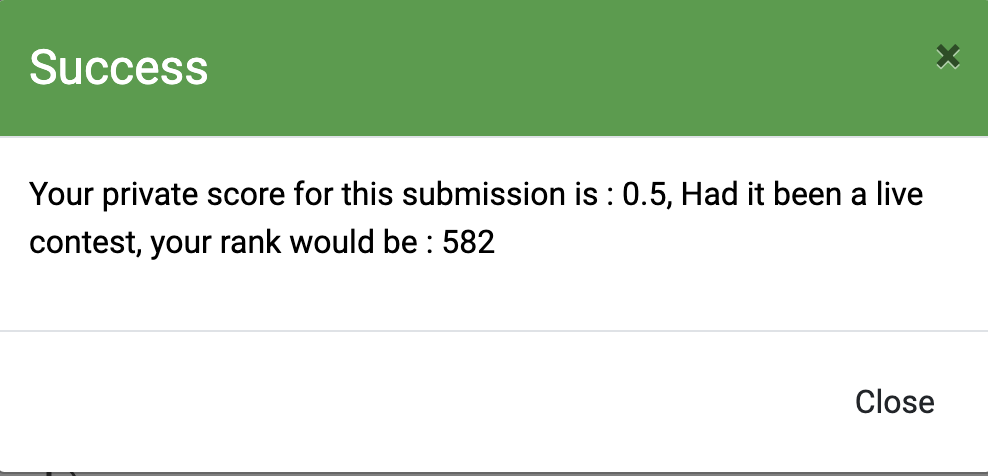

In [ ]:
age gender
23   M
54.  F
22.  M
32.  M
43.  M
5.   M
12   M
22   M
32.  F

M = 7
F = 2

Unbalanced

Oversampling or Undersampling


Oversampling

M = 7
F = 7

age gender
23   M
54.  F
22.  M
32.  M
43.  M
5.   M
12   M
22   M
32.  F
32.  F
32.  F
32.  F
54.  F
54.  F


Undersampling

M = 2
F = 2


age gender

54.  F
12   M
22   M
32.  F




Domains - Health care

Cancer patient ->


Finacial

Credit card fraud transaction


Per/day - 10 Million Transaction

100 transaction Fradulent

9999900 - Non Fradulent tranction



Undersampling - Huge amount of data in less number of category (0 - 2000000, 1 - 19878)


Oversampling  - Less amount of data  (0 - 2342, 1 - 898)



In [ ]:
1. Data Understanding (Train + Test)
2. EDA (Train + Test)
3. Data Preprocessing (Pipeline)
4. Decision Tree
5. Evaluation Metrics
6. Hyperparameter
7. Different Algorithm
8. Sampling Stratergy

In [19]:
data = pd.concat([train,test],axis = 0)

In [22]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


In [24]:
data.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [25]:
data.duplicated().sum()

0

In [28]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("--------------")

id
1         1
338760    1
338773    1
338772    1
338771    1
         ..
169378    1
169377    1
169376    1
169375    1
508146    1
Name: id, Length: 508146, dtype: int64
--------------
Gender
Male      274325
Female    233821
Name: Gender, dtype: int64
--------------
Age
24    34565
23    32353
22    28058
25    27578
21    21910
      ...  
81       77
82       42
83       32
84       18
85       12
Name: Age, Length: 66, dtype: int64
--------------
Driving_License
1    507097
0      1049
Name: Driving_License, dtype: int64
--------------
Region_Code
28.0    141937
8.0      44900
46.0     26357
41.0     24400
15.0     17750
30.0     16276
29.0     14843
50.0     13657
3.0      12349
11.0     12328
36.0     11696
33.0     10307
47.0      9942
35.0      9309
6.0       8351
45.0      7543
37.0      7343
18.0      6903
48.0      6274
14.0      6249
39.0      6138
10.0      5847
21.0      5671
2.0       5398
13.0      5396
7.0       4313
12.0      4235
9.0       4084
32.0      3745
27.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

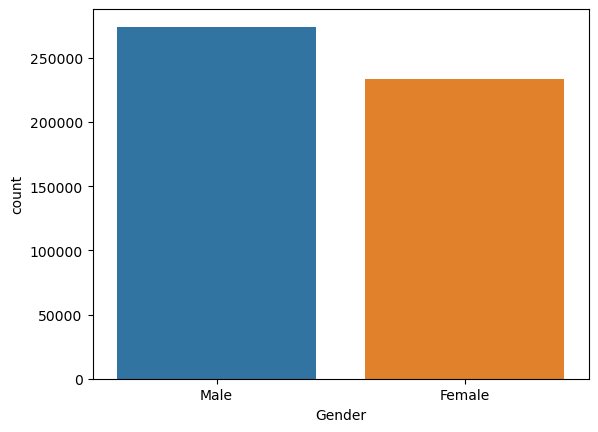

In [29]:
sns.countplot(data = data, x = "Gender")

In [33]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

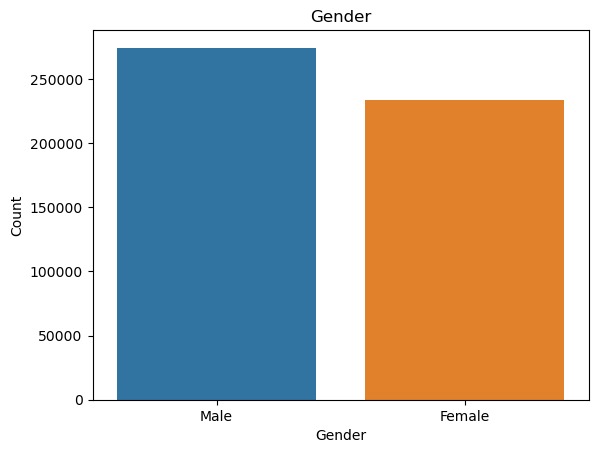

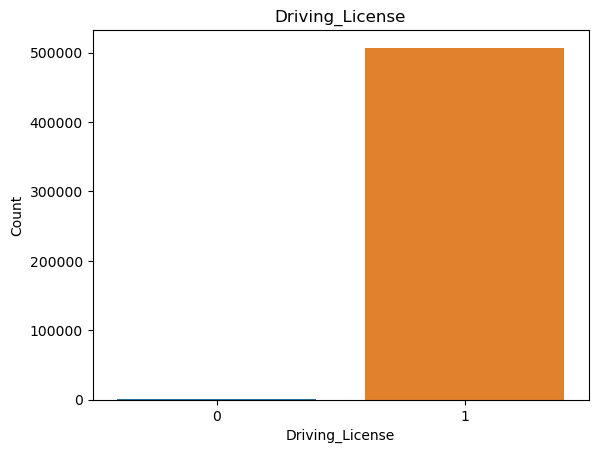

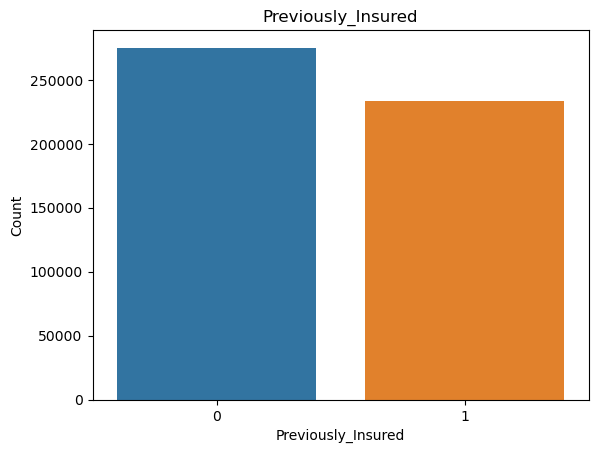

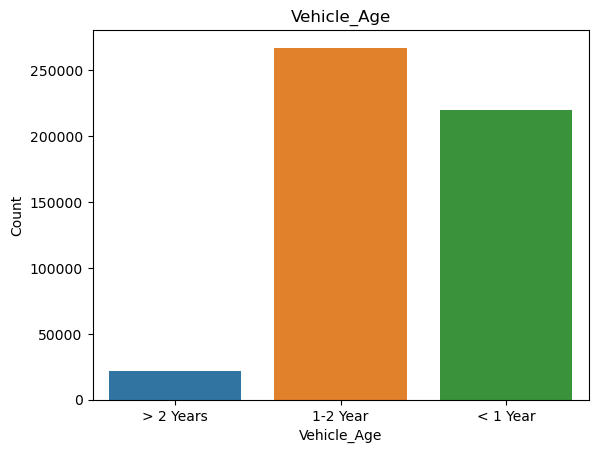

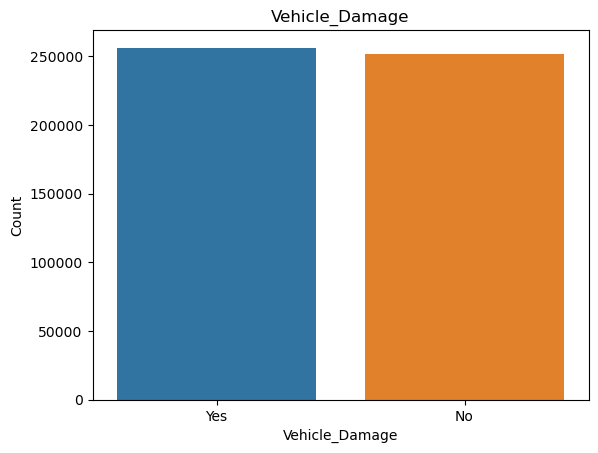

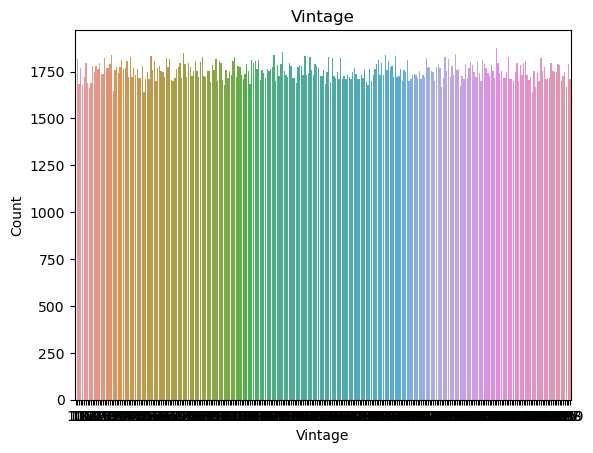

In [39]:
for i in ['Gender','Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
       'Vintage']:
    sns.countplot(data = data, x = i)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

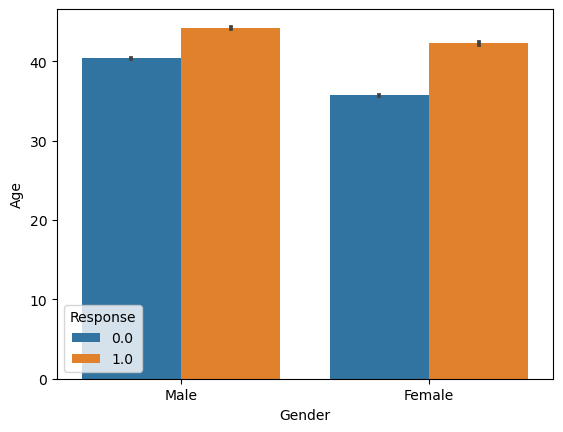

In [31]:
sns.barplot(data = data, x = "Gender", y = 'Age', hue = 'Response' )

In [30]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


In [41]:
data.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0.0            771
                 1.0             41
1                0.0         333628
                 1.0          46669
Name: Response, dtype: int64

In [42]:
data.groupby('Gender')['Response'].value_counts()

Gender  Response
Female  0.0         156835
        1.0          18185
Male    0.0         177564
        1.0          28525
Name: Response, dtype: int64

<AxesSubplot:xlabel='Gender'>

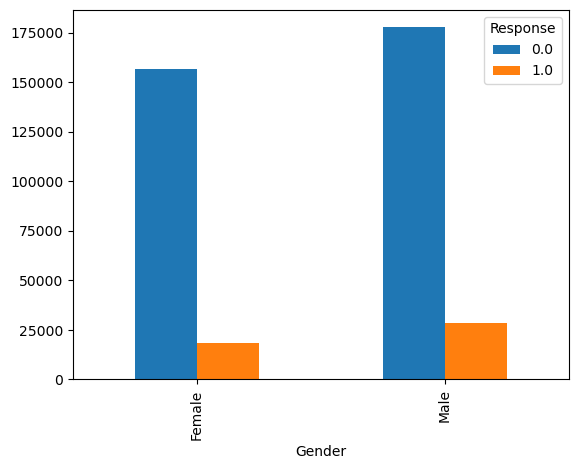

In [47]:
#Comparing how gender influense the response
pd.crosstab(data.Gender, data.Response).plot(kind = 'bar')

<AxesSubplot:xlabel='Driving_License'>

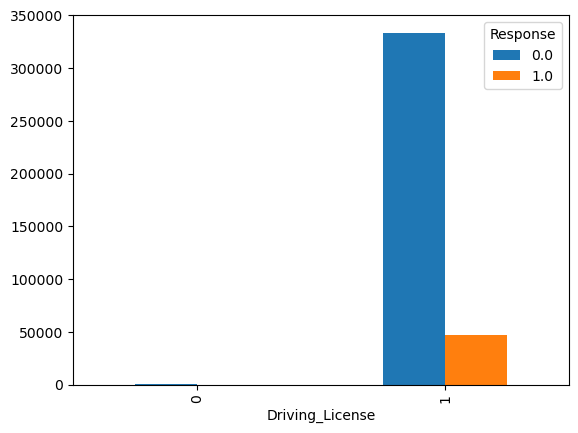

In [48]:
#Comparing how Driving_License influense the response
pd.crosstab(data.Driving_License, data.Response).plot(kind = 'bar')

<AxesSubplot:xlabel='Previously_Insured'>

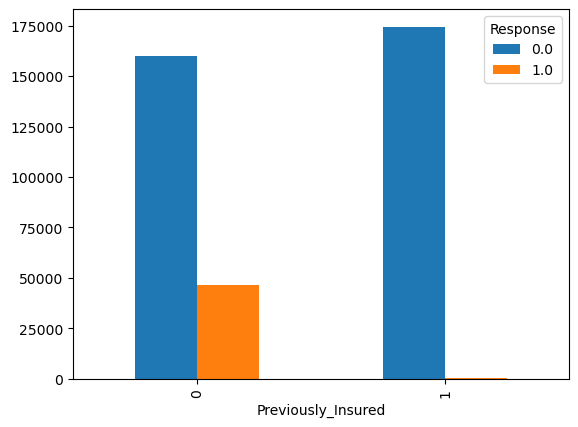

In [50]:

#Comparing how Previously_Insured influense the response
pd.crosstab(data.Previously_Insured, data.Response).plot(kind = 'bar')
# Contact those customer who have not insured so far

<AxesSubplot:xlabel='Vehicle_Age'>

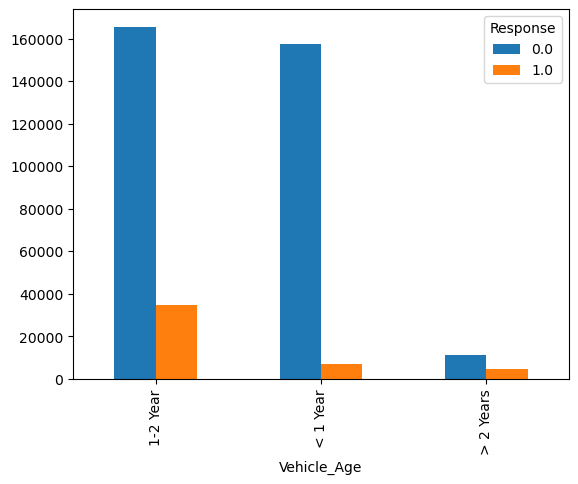

In [51]:
#Comparing how Vehicle_Age influense the response
pd.crosstab(data.Vehicle_Age, data.Response).plot(kind = 'bar')
# Contact those customer who have recently bought the vehicle

In [55]:
pd.crosstab(data.Vehicle_Age, data.Response,normalize=True)

Response,0.0,1.0
Vehicle_Age,,
1-2 Year,0.434285,0.091328
< 1 Year,0.413488,0.018897
> 2 Years,0.029663,0.012338


In [63]:
res = pd.crosstab(data.Vehicle_Age, data.Response)

In [67]:
res.sum(1)

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
dtype: int64

<AxesSubplot:xlabel='Vehicle_Age'>

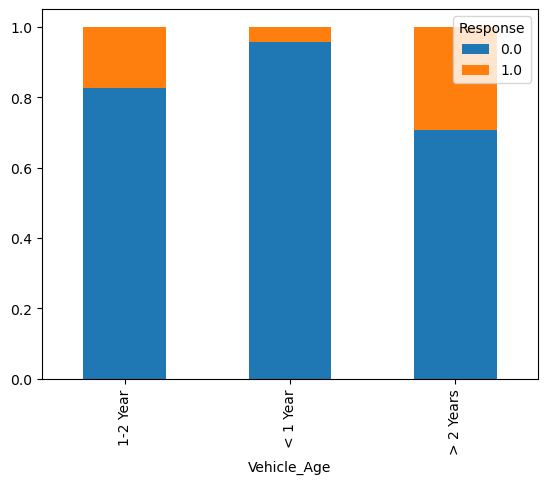

In [66]:
res.div(res.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# The customer with vehicle age more than 2 years has 30% likely to get the insurance

<AxesSubplot:xlabel='Driving_License'>

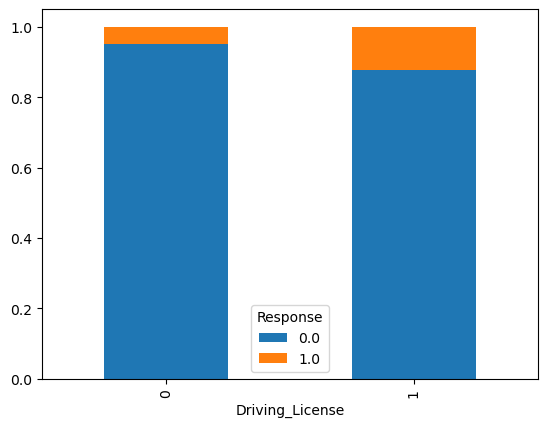

In [76]:
res = pd.crosstab(data.Driving_License, data.Response)
res.div(res.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)


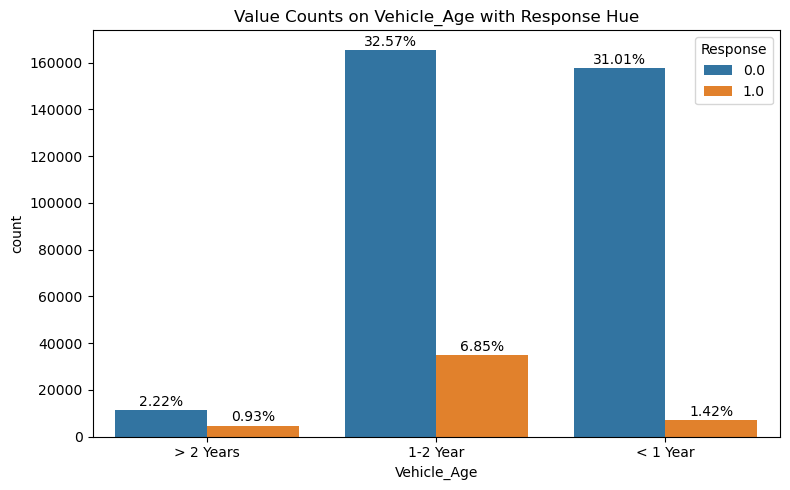

In [60]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Vehicle_Age', hue = 'Response', data=data)
plt.title('Value Counts on Vehicle_Age with Response Hue')
total = len(data)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

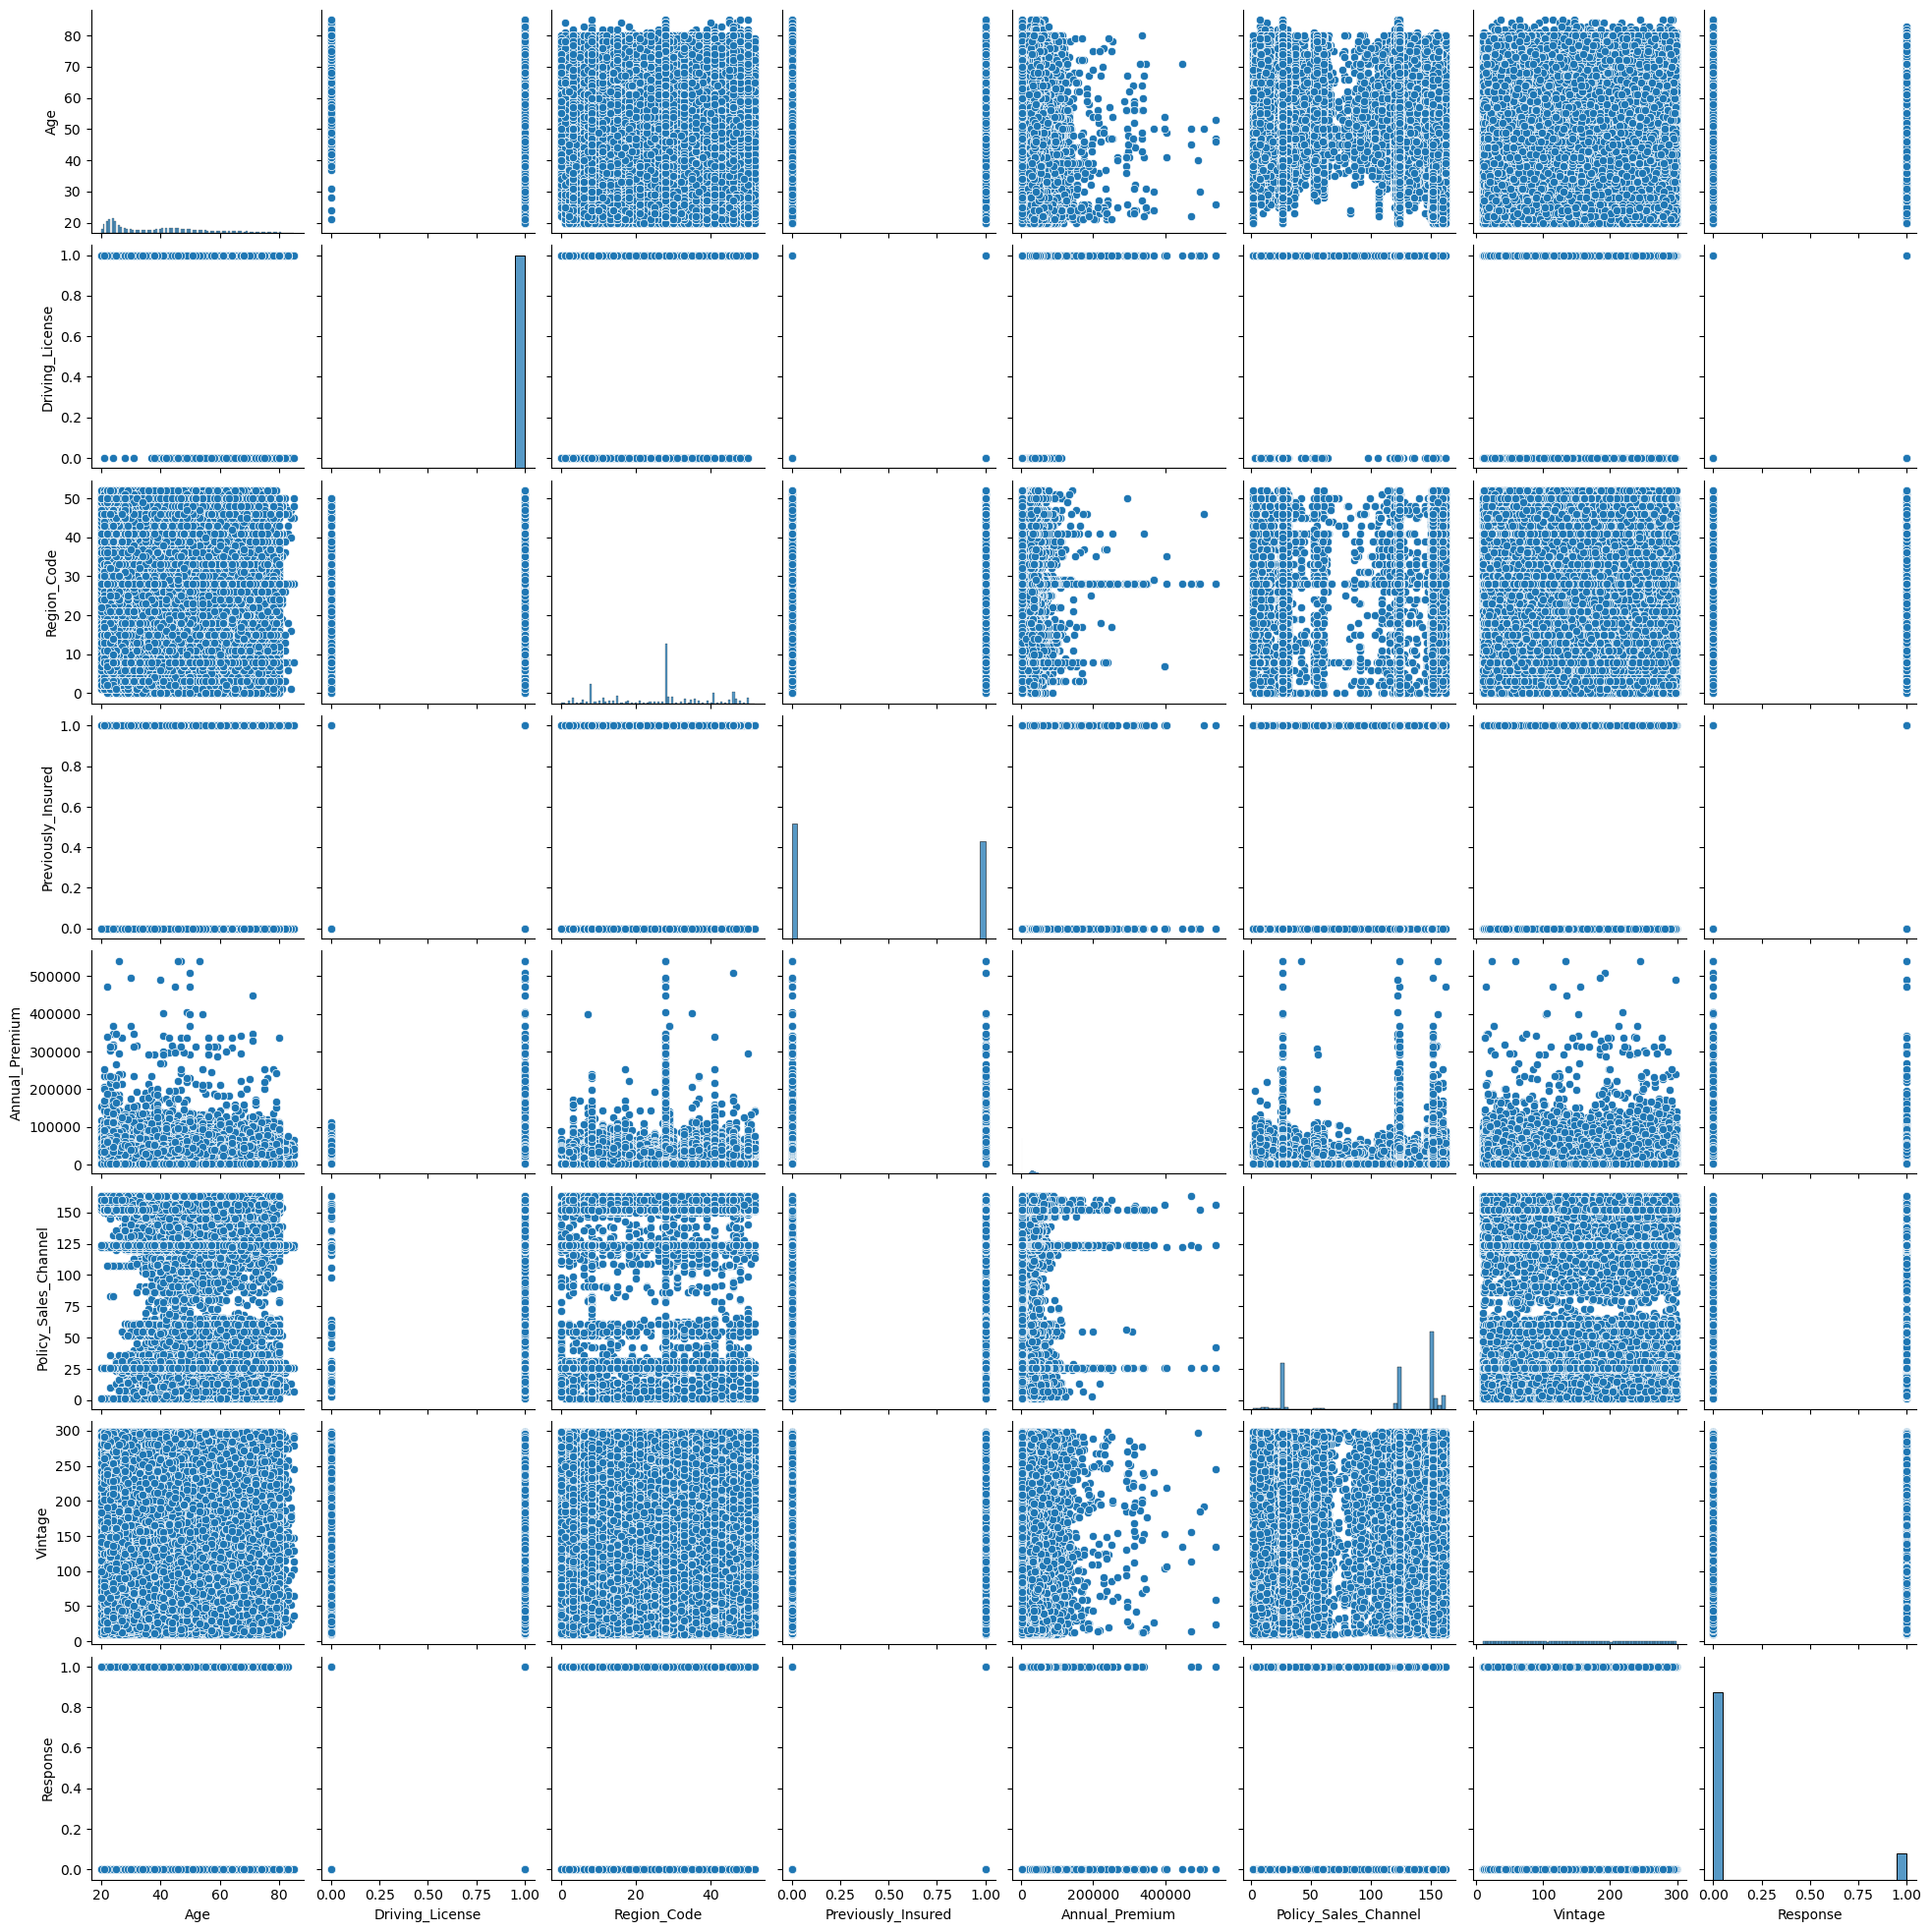

In [74]:
sns.pairplot(data.drop(columns = 'id').dropna())

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
127032,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


<AxesSubplot:>

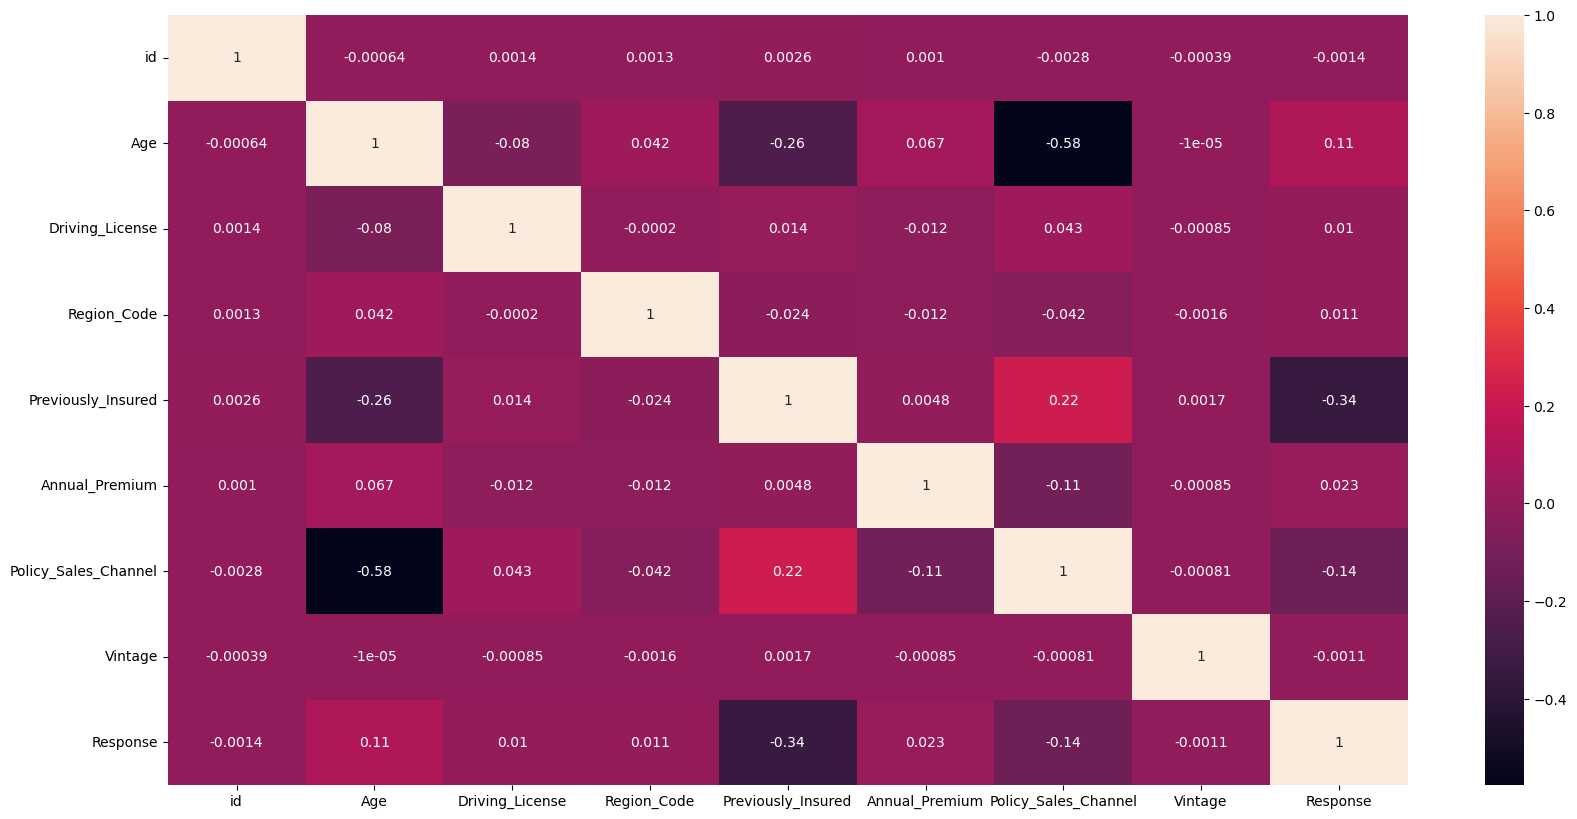

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

# Data Clearning

In [80]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


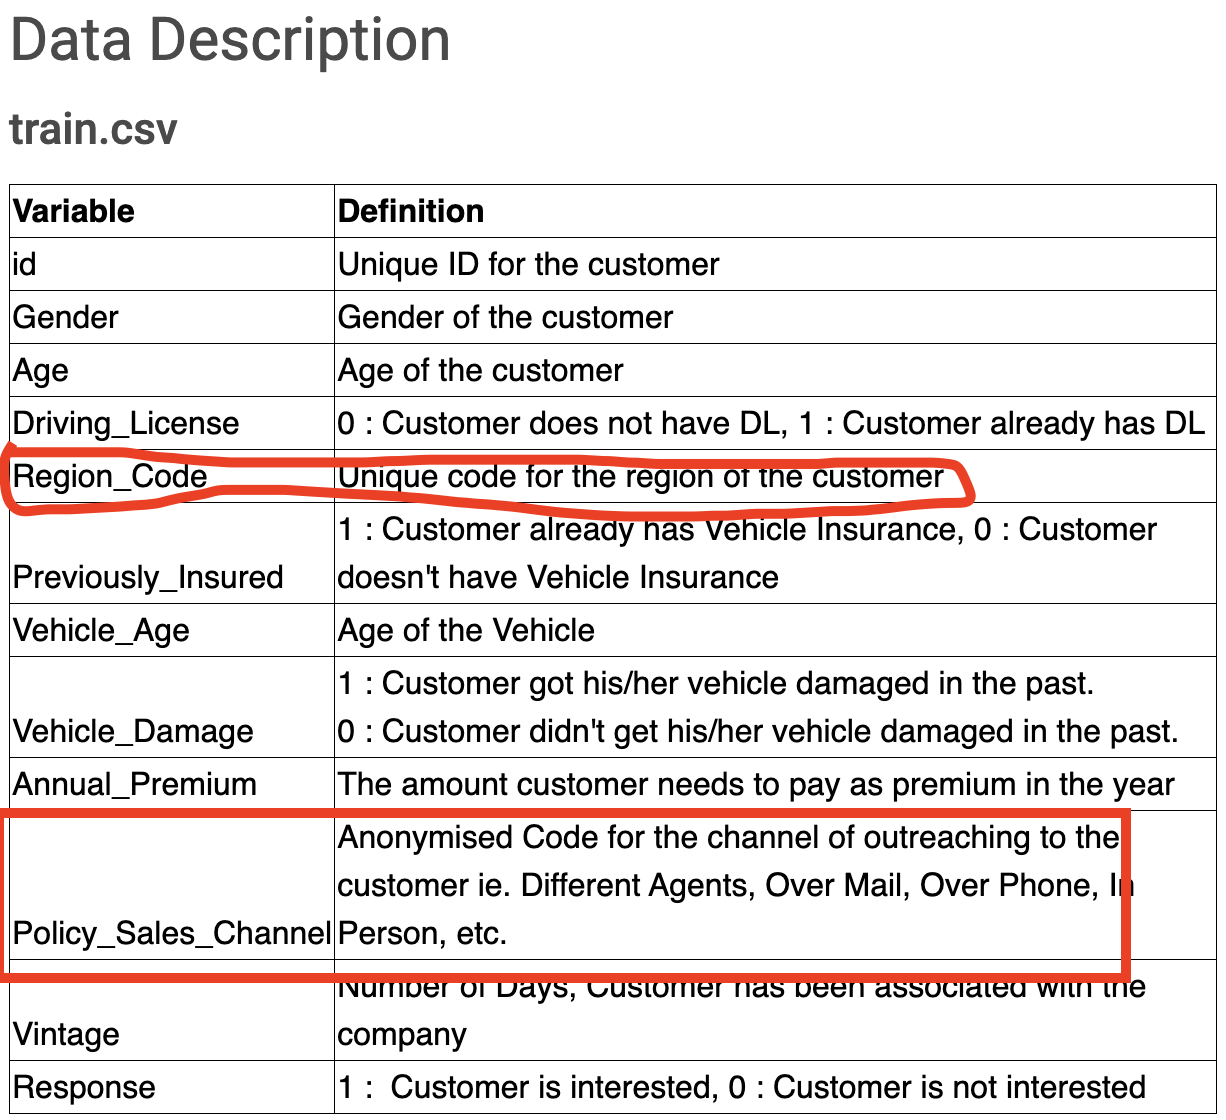

In [ ]:
1. Convert Region Code and Policy cahnnel to categorical data 
Pipline
2. Separate Category and Numerical
3. Category - one hot
4. Numerical - Scaling


In [87]:
data['Region_Code'].astype('category')

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



0         28.0
1          3.0
2         28.0
3         11.0
4         41.0
          ... 
127032    37.0
127033    28.0
127034    46.0
127035    28.0
127036    29.0
Name: Region_Code, Length: 508146, dtype: category
Categories (53, float64): [0.0, 1.0, 2.0, 3.0, ..., 49.0, 50.0, 51.0, 52.0]

In [88]:

data['Policy_Sales_Channel'].astype('category')

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
127032    152.0
127033    122.0
127034    152.0
127035     26.0
127036    124.0
Name: Policy_Sales_Channel, Length: 508146, dtype: category
Categories (157, float64): [1.0, 2.0, 3.0, 4.0, ..., 158.0, 159.0, 160.0, 163.0]

In [ ]:
### OOPs

In [241]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 66.5+ MB


In [198]:
class CustomTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X,y = None):
        return self
    def transform(self, X, y = None):
        #print("inside Tranform")
        #  Convert Region Code and Policy channel to categorical data 
        #X['Region_Code'] = X['Region_Code'].astype('category')
        #X['Policy_Sales_Channel'] = X['Policy_Sales_Channel'].astype('category')
        #X['Driving_License'] = X['Driving_License'].astype('category')
        X['Previously_Insured'] = X['Previously_Insured'].astype('category')
        #print(X)
        return X
        

In [199]:
custom_pipleline = Pipeline([
    ('Custom_category_convert_from_numerical_data',CustomTranformer()),
])

In [200]:
numerical_ = Pipeline([
    ('imputation',SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])


In [201]:
categorical_ = Pipeline([
    ('imputation',SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [202]:
category_ = Pipeline([
   ('ColumnTransform',custom_pipleline),
   ('categorical', categorical_)
])

In [203]:
preprocess_full = ColumnTransformer(
    transformers=
    [
    ('numerical',numerical_, ['Age','Annual_Premium','Vintage']),
    ('categorical', category_, ['Previously_Insured', 'Gender', 'Vehicle_Age', 'Vehicle_Damage'])    
])

In [216]:
pipe_model = Pipeline([
    ('preprocess',preprocess_full),
    ('model', LogisticRegression())
])

In [217]:
X = train.drop(columns = "Response")
y = train['Response']

In [218]:
y

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
381104    0.0
381105    0.0
381106    0.0
381107    0.0
381108    0.0
Name: Response, Length: 381109, dtype: float64

In [219]:
from sklearn import set_config
set_config(display='diagram')
display(pipe_model)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('model', LogisticRegression())])

In [220]:
pipe_model.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('model', LogisticRegression())])

In [224]:
test_predict_logistic = pipe_model.predict_proba(test)[:,1]

In [225]:
sample_submission['Response'] = test_predict_logistic

In [240]:
np.where(test_predict_logistic>0.6,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [227]:
sample_submission.to_csv('Logistic_result.csv', index=False)

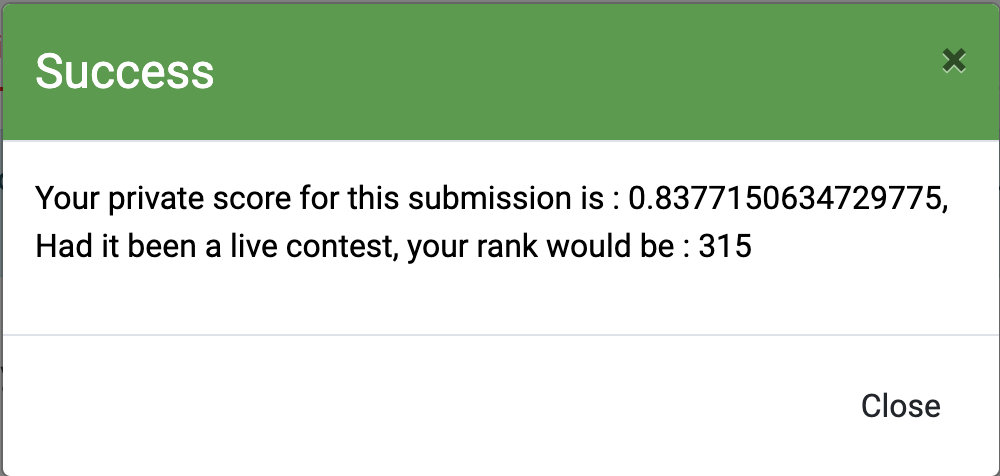

# With Polynomial

In [232]:
pipe_model_poly = Pipeline([
    ('preprocess',preprocess_full),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
])

In [233]:
pipe_model_poly.fit(X,y)

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [234]:
test_predict_logistic_poly = pipe_model_poly.predict_proba(test)[:,1]

sample_submission['Response'] = test_predict_logistic_poly

sample_submission.to_csv('Logistic_poly_result.csv', index=False)

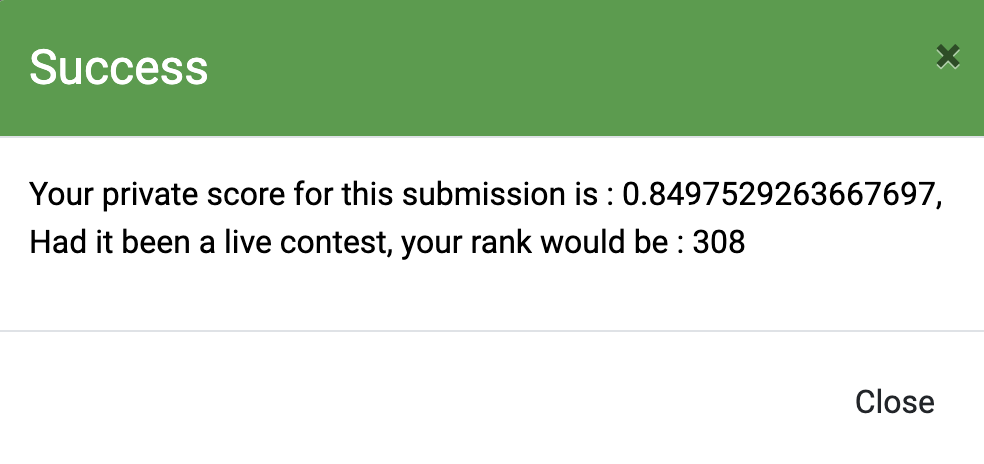

In [236]:
pipe_model_poly_decision = Pipeline([
    ('preprocess',preprocess_full),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeClassifier())
])

In [237]:
pipe_model_poly_decision.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', DecisionTreeClassifier())])

In [239]:
test_predict_decision_poly = pipe_model_poly.predict_proba(test)[:,1]
sample_submission['Response'] = test_predict_decision_poly

sample_submission.to_csv('Decision_poly_result.csv', index=False)

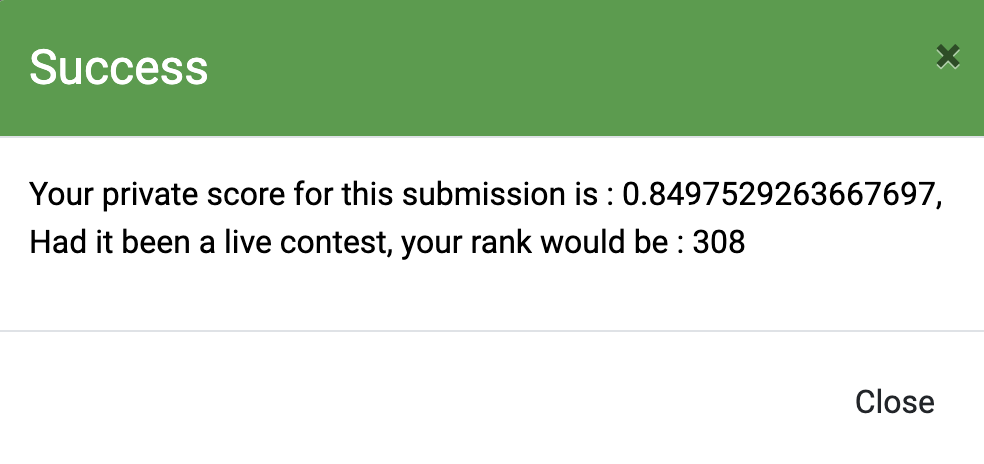

# ROC_AUC on Train 

Area under the Receiver Operating Characteristic curve: 0.8450524562184716


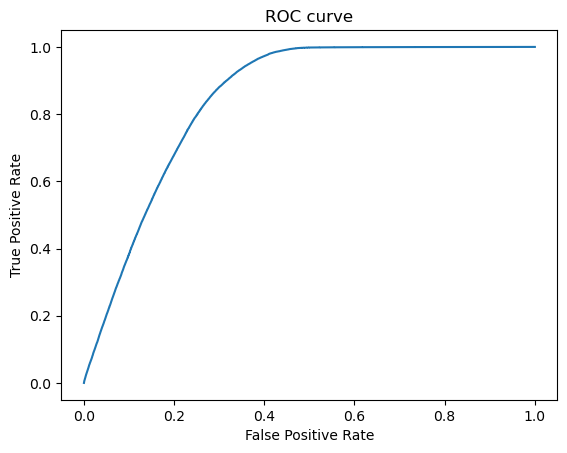

In [245]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y, pipe_model_poly.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y, pipe_model_poly.predict_proba(X)[:,1]))

In [248]:
pipe_model_poly_decision['model']

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

In [250]:
params = {
        'model__criterion' :["gini", "entropy"],
        'model__max_depth' :[None, 2,4,6,10,15,20],
        'model__min_samples_split' : [2,3,4,5,6],
        'model__min_samples_leaf' : [1,2,3,5],
        'model__max_features' : [None, "auto", "sqrt", "log2"]
}

In [257]:
#Scoring
#https://scikit-learn.org/stable/modules/model_evaluation.html

grid = RandomizedSearchCV(estimator = pipe_model_poly_decision,param_distributions = params, scoring = 'roc_auc', cv = 2, verbose = 2)

In [258]:
grid.fit(X,y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END model__criterion=entropy, model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4; total time=   1.6s
[CV] END model__criterion=entropy, model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4; total time=   1.8s
[CV] END model__criterion=entropy, model__max_depth=4, model__max_features=None, model__min_samples_leaf=3, model__min_samples_split=6; total time=   2.3s
[CV] END model__criterion=entropy, model__max_depth=4, model__max_features=None, model__min_samples_leaf=3, model__min_samples_split=6; total time=   2.1s
[CV] END model__criterion=entropy, model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=6; total time=   1.0s
[CV] END model__criterion=entropy, model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=6; total time=   0.9s
[CV

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputation',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Annual_Premium',
                                                                                'Vintage']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('ColumnTransform',
                                                                                                Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                                                 CustomTranformer...
                                                                                'Vehicle_Age',
                                                                                'Vehicle_Damage'])])),
                                             ('polynomial',
                                              PolynomialFeatures()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [None, 2, 4, 6, 10,
                                                             15, 20],
                                        'model__max_features': [None, 'auto',
                                                                'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 3, 5],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6]},
                   scoring='roc_auc', verbose=2)

In [259]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('polynomial', PolynomialFeatures()),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,
                                        min_samples_split=6))])

In [260]:
grid.best_score_

0.843450455180194

In [261]:
grid.best_estimator_.predict_proba(test)

array([[9.99759047e-01, 2.40953299e-04],
       [6.77764877e-01, 3.22235123e-01],
       [6.77764877e-01, 3.22235123e-01],
       ...,
       [9.99759047e-01, 2.40953299e-04],
       [9.98864411e-01, 1.13558937e-03],
       [9.98765051e-01, 1.23494906e-03]])

In [262]:
test_predict_decision_poly_tuned = grid.best_estimator_.predict_proba(test)[:,1]
sample_submission['Response'] = test_predict_decision_poly_tuned

sample_submission.to_csv('Decision_poly_tuned_result.csv', index=False)

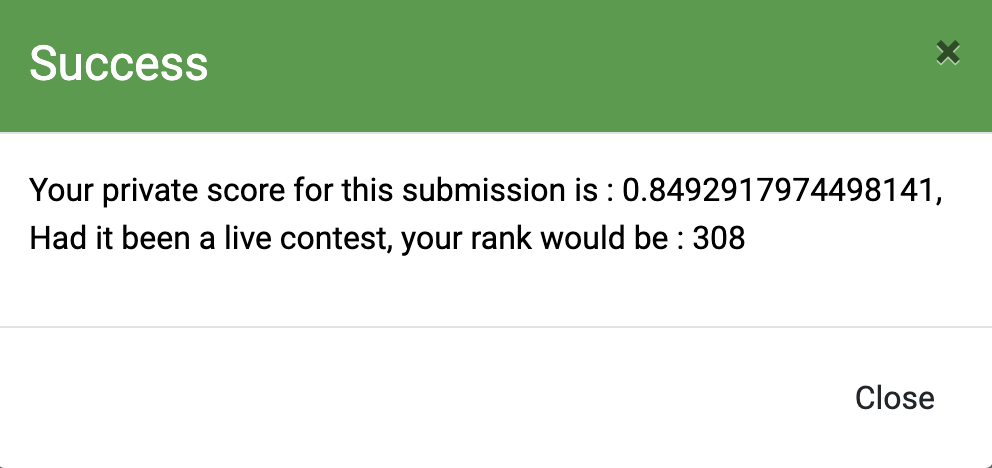 

In [263]:
train['Response'].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [268]:
from imblearn.over_sampling import SMOTE

# Modeling with Balincing the data

In [278]:
rus = RandomUnderSampler(random_state=42)
X_b,y_b = rus.fit_resample(X,y)

In [287]:
ros = RandomOverSampler(random_state=42)
X_b_,y_b_ = ros.fit_resample(X,y)

In [280]:
y_b.value_counts()

0.0    46710
1.0    46710
Name: Response, dtype: int64

In [288]:
y_b_.value_counts()

1.0    334399
0.0    334399
Name: Response, dtype: int64

In [283]:
pipe_model_poly_balanced = Pipeline([
    ('preprocess',preprocess_full),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
])

In [284]:
pipe_model_poly_balanced.fit(X_b,y_b)

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [285]:
test_predict_logistic_poly_balanced = pipe_model_poly_balanced.predict_proba(test)[:,1]
sample_submission['Response'] = test_predict_logistic_poly_balanced

sample_submission.to_csv('Logistic_poly_balanced_result.csv', index=False)

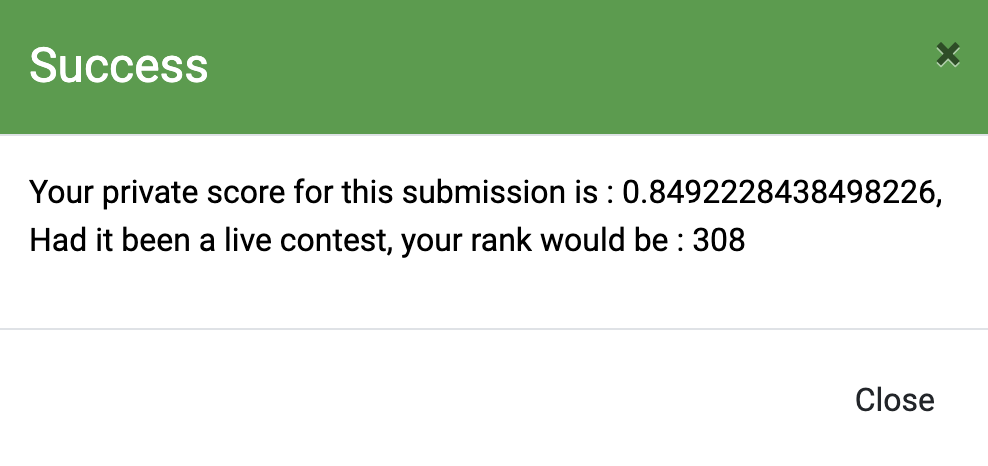

In [289]:
pipe_model_poly_balanced.fit(X_b_,y_b_)

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ColumnTransform',
                                                                   Pipeline(steps=[('Custom_category_convert_from_numerical_data',
                                                                                    CustomTranformer())])),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encode',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]))]),
                                                  ['Previously_Insured',
                                                   'Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [290]:
test_predict_logistic_poly_balanced = pipe_model_poly_balanced.predict_proba(test)[:,1]
sample_submission['Response'] = test_predict_logistic_poly_balanced

sample_submission.to_csv('Logistic_poly_balanced_oversampling_result.csv', index=False)

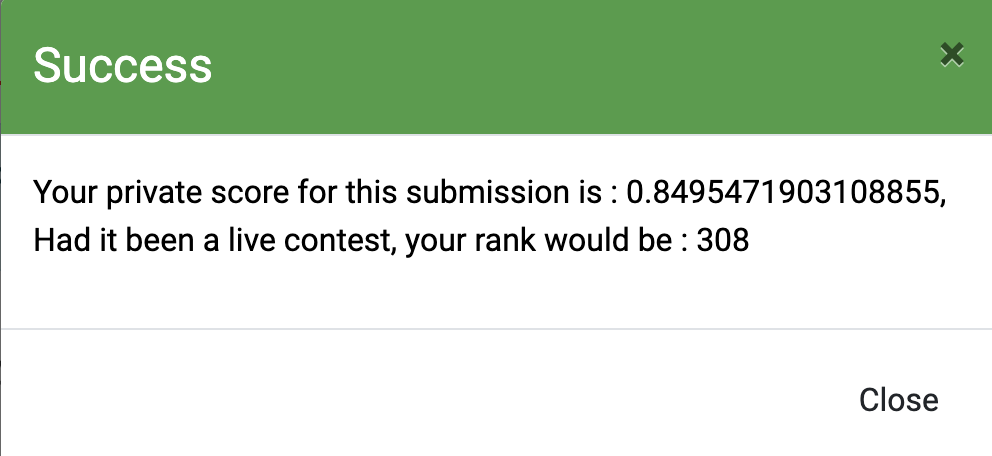